In [8]:
from face_extractor.face_extractor import FaceExtractor
import pandas as pd

In [2]:
extractor = FaceExtractor(
    '/opt/ml/input/final-project-level3-cv-10/data/testvideo_3_0.mp4',
    '/opt/ml/input/final-project-level3-cv-10/data/',
    '/opt/ml/input/final-project-level3-cv-10/result',
    threshold=0.65,
    face_cnt=350,
    face_cloth_weights = [1, 0.7],
    min_csize=10,
    use_merging=True
)

--------------------------------------------------------------------------------
[Source Video File]: /opt/ml/input/final-project-level3-cv-10/data/testvideo_3_0.mp4
[Frame resolution H x W]: (720.0 x 1280.0)
[FPS]: 29
[Total number of frames]: 31935
[Total number of seconds]: 1065
Process every 3 secs (90 frames)
face & cloth weights: [1, 0.7]
sim_threshold: 0.65
face_cnt: 350
min_csize: 10
use merging: True
--------------------------------------------------------------------------------
Using GPU


In [3]:
final_clusters = extractor.cluster_video()

>>> Extracting fingerprints...
>>> Clustering fingerprints...
>>> Merging clusters...
>>> Calculating average encoding and representative encoding...


In [4]:
extractor.summarize_results()

-------------------------------- Result Summary --------------------------------
[Face Extraction]: 29.142 seconds
[Clustering Fingerprints]: 0.018 seconds
[Merging Clusters]: 0.008 seconds
[Average Encoding & Pick Representative]: 5.136 seconds
[Total time]: 34.303 seconds
Total number of detected persons: 6
--------------------------------------------------------------------------------


In [43]:
import numpy as np
imgs = [cluster['repr_img_array'] for cluster in extractor.final_dict.values()]

In [44]:
img_width = [img.shape[1] for img in imgs]
img_height = [img.shape[0] for img in imgs]
max_width = max(img_width)
total_height = sum(img_height)

In [45]:
combined_img = np.ones((total_height, max_width, 3))
combined_img.shape

(2709, 591, 3)

In [46]:
cum_height = 0
for img in imgs:
    combined_img[cum_height: cum_height + img.shape[0], : img.shape[1]] = img
    cum_height += img.shape[0]

In [51]:
combined_img = combined_img.astype(np.int32)

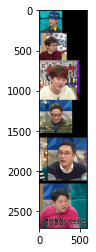

In [52]:
import matplotlib.pyplot as plt

plt.imshow(combined_img)

In [ ]:
cv2.imwrite

In [6]:
from clustering_metric import davies_bouldin_index

In [7]:
DBI = davies_bouldin_index(extractor.fingerprints)

/opt/ml/input/final-project-level3-cv-10/result/imagecluster/merged_clusters/cluster_with_11/cluster_0
/opt/ml/input/final-project-level3-cv-10/result/imagecluster/merged_clusters/cluster_with_30/cluster_0
/opt/ml/input/final-project-level3-cv-10/result/imagecluster/merged_clusters/cluster_with_18/cluster_0
/opt/ml/input/final-project-level3-cv-10/result/imagecluster/merged_clusters/cluster_with_43/cluster_0
/opt/ml/input/final-project-level3-cv-10/result/imagecluster/merged_clusters/cluster_with_26/cluster_0
/opt/ml/input/final-project-level3-cv-10/result/imagecluster/merged_clusters/cluster_with_39/cluster_0
1.1631421086674993 4
1.2406470292405862 4
1.0533451129925653 5
1.1225233508828014 4
1.2406470292405862 1
1.1589777533543661 0


In [9]:
extractor.config

{'face_cloth_weights': [1, 0.7],
 'sim_threshold': 0.65,
 'face_cnt': 350,
 'min_csize': 10,
 'use_merging': True}

In [ ]:
col_names = ['face_cloth_weights', 'sim_threshold', 'face_cnt', 'min_csize', 'use_merging']
df = pd.DataFrame(columns=col_names)



In [ ]:
 python extract_persons.py --weights 1.0 0.7 --sim_thresh 0.58 --face_cnt 300 --min_csize 10 --use_merging true